In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [43]:
img1 = cv2.imread('book.png', 0) # queryImage
img2 = cv2.imread('book_in_scene.png', 0) # trainImage


In [44]:
# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [45]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
plt.imshow(img3),plt.show()


error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\core\src\batch_distance.cpp:282: error: (-215:Assertion failed) (type == CV_8U && dtype == CV_32S) || dtype == CV_32F in function 'cv::batchDistance'


In [46]:
print(kp1[0])

<KeyPoint 0000022691B73900>


In [47]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

In [58]:
good = []
for m,n in matches:
    #print(m.distance, n.distance)
    if m.distance < 0.5*n.distance:
        good.append([m])

In [59]:
print(len(good))

3030


In [60]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

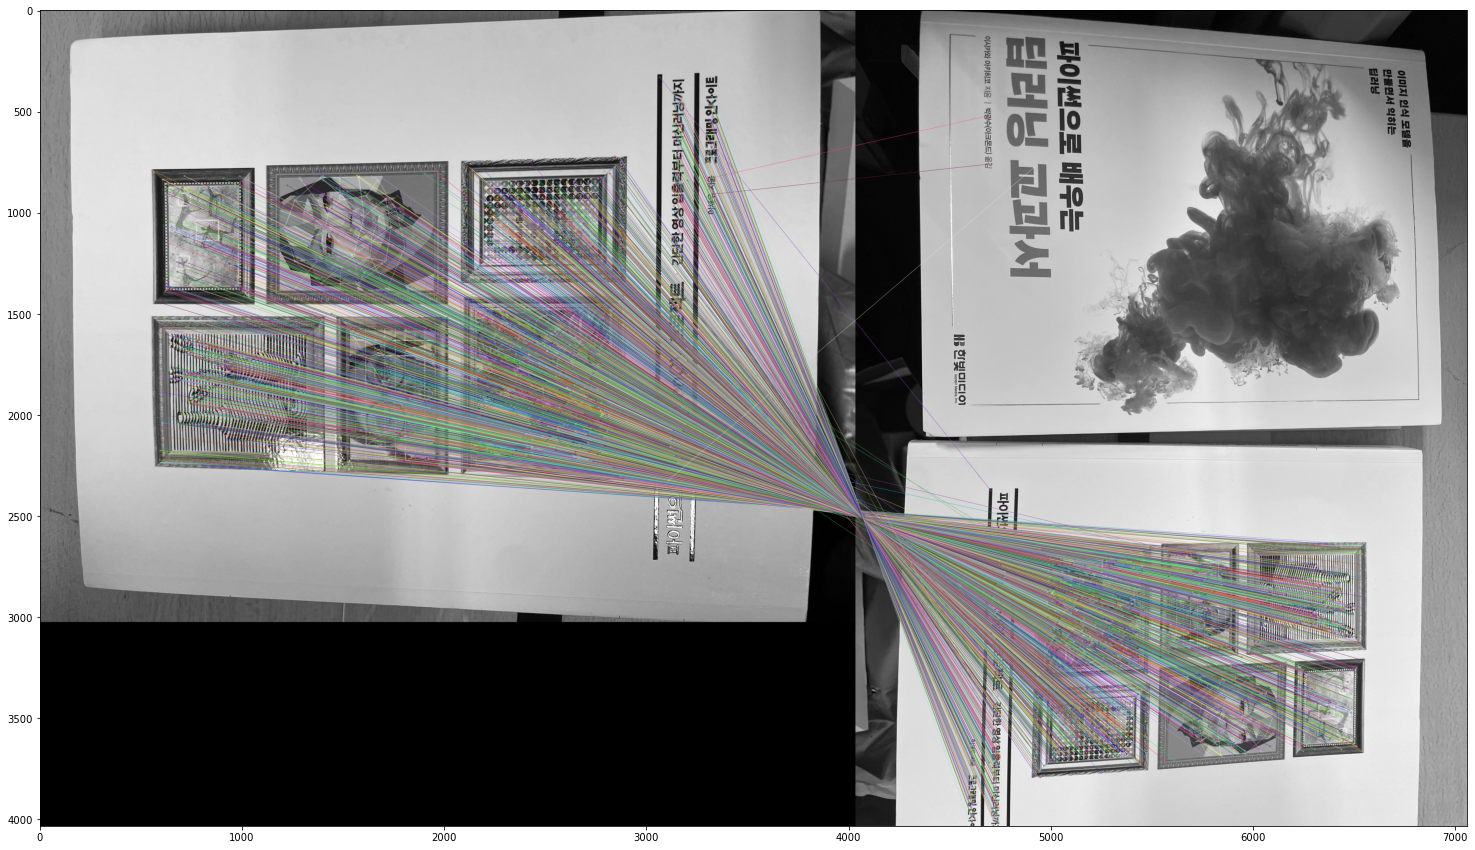

(<matplotlib.image.AxesImage at 0x226958b99d0>, None)

In [61]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()